In [4]:
from sympy import *

## Método da Bisseção
Ordem de convergência linear

Criterio de parada (b - a) / 2 < tol

Precisa de um intervalo definido no começo, através da análise gráfica
Pegamos o exemplo de $$f(x) = \frac{\sin(x)} {(x-1)^2} -1$$

Queremos $$ \overline{x} $$ o zero da função, tal que $$f(\overline{x}) = 0$$

Ou seja, 
$$\frac{\sin(x)} {(x-1)^2} - 1 = 0 $$

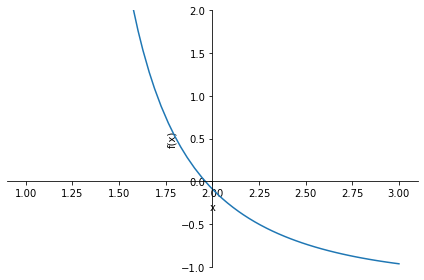

In [81]:
x = symbols('x')
def f(x):
    return sin(x)/(x-1)**2 - 1

plot(f(x), (x, 1, 3), ylim=[-1,2])

Da análise gráfica, percebemos que um dos zeros da função está entre 1 e 3.

O método da bisseção parte do princípio de ralizar um média entre esses dois limites, e testar a imagem deste novo valor.

Para ilustrar melhor, chamemos o limite superior de B, o limite inferior de A, e o próximo limite de R:

$$ R = \frac{A + B} {2}$$

$$ R = \frac{1 + 3} {2}$$

$$ R = 2$$

Sabendo disso, podemos substituir algum valor (A ou B) pelo nosso R. Mas note que precisamos manter a propriedade que as imagens de A e B tem sinais opostos, pois juntas "cercam" a raiz verdadeira. Disto sabemos que:

$$f(A) * f(B) < 0$$

Logo:

SE f(A) * f(R) < 0:

    B = R
    
SENAO 

    A = R
    
O que manterá os valores com sinais opostos.

Perceba que R está sempre um passo mais próximo da raiz real da função $$\overline{x}$$, então, se repetirmos este procedimento vezes suficientes, chegares a uma aproximação boa para a raiz real.

# Erros

Note que a distância entre R e a raiz verdadeira é sempre menor ou igual a distância entre A e B, já que tanto R quanto a raiz estão dentro do intervalo [A, B].

Disso, decorre que $$ Erro < \frac {B - A} {2} $$

Isso nos permite uma condição de parada dada uma tolerancia para o erro. Quando soubermos que $$ \frac {B - A} {2} < TOL $$ podemos encerrar as iterações

In [120]:
#Método da bisseção mais simples
def bis(f, a, b, tol):
    if a > b:
        a, b = b, a
    
    nf = 100 #limite de iterações
    
    for _ in range(nf):
        r = (a + b) / 2 #novo valor
        
        fr = f(r)
        fa = f(a)
        fb = f(b)
        
        #se está contida na tolerancia
        if (b - a)/2 < tol:
            return r
        
        if fa * fr < 0:
            b = r
        else:
            a = r
    print("O método falhou")

Como sempre estamos dividindo o intervalo ao meio, na n-esima iteração, temos que: $$ En < \frac {B - A} {2^n} $$

Se precisamos de uma precisao/tolerancia ε, podemos exigir que o erro seja menor que a nossa precisão se : $$ E < \frac {B - A} {2^n} < \epsilon$$

Logo, se a fração do meio for menor que nossa tolerancia ao erro, sabemos que o erro verdadeiro também é. Isso, por si só, já serve como criterio de parada:

$$\frac {B - A} {2^n} < \epsilon$$

Isolando n (o número de iterações) temos que:

$$ n = \log_2 \frac { B - A} {\epsilon} $$

Assim, sabemos o número de iterações necessárias para atingir a precisão requerida

In [121]:
#Método da bisseção utilizando o calculo do número de iterações
#Não me lembro do professor ter usado este (apesar de ter passado o conteúdo),
#na duvida talvez seja melhor pegar o primeiro
def bissection_method(f, a, b, err):
    it = ( b - a ) / err
    it = log( it, 2 )
    it = ceiling( it )
        
    if not it.is_real:
        print("O metodo falhou")
        return
    
    for _ in range(it):
        r = (a + b) / 2
        ya = f(a)
        yb = f(b)
        yr = f(r)
        
        if(ya * yr < 0):
            b = r
        else:
            a = r
    return r

In [122]:
#em um intervalo sem raiz
print(bissection_method(f, 1.5, 1.2, 0.00001))

O metodo falhou
None


In [123]:
#em um intervalo com raiz
print(bissection_method(f, 1.5, 3, 0.000001))

1.9615695476531982


In [125]:
#em um intervalo sem raiz
print(bis(f, 1.5, 1.2, 0.00001))

1.4999908447265624


In [126]:
#em um intervalo com raiz
print(bis(f, 1.5, 3, 0.00001))

1.961568832397461
